# Detecting Rock Paper Scissors using CNN

<img src="./images/rock-paper-scissors.jpeg" style="width:510px"/>



This example is a little more advanced than what we have seen so far.

What we are trying to do here is to classify an image as rock - paper or scissors.

The dataset can be download from the following link:

https://www.tensorflow.org/datasets/catalog/rock_paper_scissors

## New Functions used in this notebook

**ImageDataGenerator**

Allows the users to perform image augmentation while training the model. With **Data augmentation** we are refering to the creation of new unseen data from exising data something that is very usefull when we are dealing with image detections and we do not have enough data.

This function is meant to be used only in training data and not it testing.

The techniques used to augment the data are: 

- Horizontal and vertical flip: Inverting columns and rows
- Change brightness: Randomnly darkening of lighting the image.
- Rotate: Spins the picture clockwise by a specific angle

See also:
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

**ImageDataGenerator.flow_from_directory**

**flow_from_directory** is a method of the ImageDataGenerator which is used to create an "image stream" from images that are stored in the disk.  Using a standarization in the structure of the directories this method provides a convinient abstraction to provided labels to the model training function (**fit**). 

In our example the structure of the data (images) can be seen in this picture:

<img src="./images/rps-dir-struct.png" style="width:510px"/>


See also:
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator




In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras_preprocessing
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os

%matplotlib inline

In [20]:
TRAINING_DIR = "./images/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "./images/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

#model.save("rps.h5")


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                     

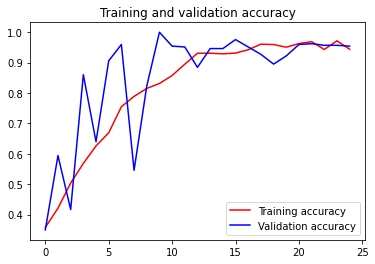

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [23]:
history.history['accuracy']

[0.35753968358039856,
 0.42103174328804016,
 0.5035714507102966,
 0.5682539939880371,
 0.6257936358451843,
 0.6690475940704346,
 0.7547619342803955,
 0.7888888716697693,
 0.815079391002655,
 0.8313491940498352,
 0.8575396537780762,
 0.8948412537574768,
 0.9309523701667786,
 0.9309523701667786,
 0.9289682507514954,
 0.9313492178916931,
 0.942460298538208,
 0.9607142806053162,
 0.9595237970352173,
 0.9507936239242554,
 0.9626984000205994,
 0.9690476059913635,
 0.9432539939880371,
 0.9718254208564758,
 0.9440476298332214]